# Chapter 11 - Spot-Check Classification Algorithms
- A way to discover which algorithms perform well
- You must trial a number of methods and focus attention on those that prove themselves

### Algorithm Spot Checking
What algorithms should I spotcheck on my dataset?
- mixture of algorithm representatins (instances and trees)
- mixture of learning algorithms
- mixture of modeling types (linear and nonlinear or parametric and nonparametric)

### Algorithm Overview

2 types of linear machine learning algorithms
- Logistic Regression
- Linear Discriminant Analysis

4 types of nonlinear machine learning algorithms
- k-Nearest Neighbors
- Naive Bayes
- Classification and Regression Tress
- Support Vector Machines

## Linear ML ALgorithms
### Logistic Regression
- assumes gaussian distribution of numeric input and can model binary classification

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [4]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7708646616541353


Closer to 1 is better

### Linear Discriminant Analysis (LDA)
- binary and mulitclass classifications 
- assumes gaussian distribution

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


## Nonlinear ML Algorithms
### K-Nearest Neighbors (KNN)
- distance metricto find the k most similar instances in the training data for a new instance

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7109876965140123


### Naive Bayes
- the conditional probablity of each class given each input value
- Gaussian distribution is assumed

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [9]:
from sklearn.naive_bayes import GaussianNB

nodel = GaussianNB()
results = cross_val_score(model, X,Y, cv=kfold)
print(results.mean())

0.7109876965140123


### Classification and Regression Trees (CART or jsut Decision Trees)
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
results = cross_val_score(model, X,Y, cv=kfold)
print(results.mean())

0.6837320574162679


### Support Vector Machines (SVM)
- seek a line that best separtes two classes
- the data that is closestes to that line are called support vectors and influence where the line is placed.
- has been extended to support multiple classes
- use of different kernel functions via the kernel parameter (Radial Basis Function is default)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [13]:
from sklearn.svm import SVC
model = SVC()
results = cross_val_score(model, X,Y,cv=kfold)
print(results.mean())

0.760457963089542


--------
# Chapter 12 - Spot Check Regression Algorithms

4 linear ML algorithms
- Linear Regression
- Ridge Regression
- LASSO Linear Regression
- Elastic Net Regression

3 nonlinear ML algorithms
- k-Nearest Neighbors
- Classification And Regression Tree
- Support Vector Machines

### Linear Regression
- Assumes Gaussian distribution

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

dataframe = read_csv(filename, sep='\s+', names=names)

In [19]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

In [21]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model,X,Y,cv=kfold, scoring=scoring)
print(results.mean())

-23.746501811313365


### Ridge Regression
- an extension of linear regression wher the loss function is modified to minimize the complexity of the model measured as sum squared values of the coefficient values (aka L2-norm)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [23]:
from sklearn.linear_model import Ridge

model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-23.88989018505344


### LASSO Regression
- Least Absolute Shrinkage and Selection Operator is a modification of linear regression where the loss function is modified to minimize the complexity of the model measured as the su absolute value of the coefficient values (L1-norm)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [26]:
from sklearn.linear_model import Lasso

model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y , cv=kfold, scoring=scoring)
print(results.mean())

-28.74589007585154


### ElasticNet Regression
- combines Ridge Regression and LASSO Regression L2-norm 
- It seeks to reduce the magnitude and number of regression coefficeints by using both (sum squared coefficient values) and L1-norm (sum absolute coefficeint values)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [27]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y , cv=kfold, scoring=scoring)
print(results.mean())

-27.908420360231055


## Nonlinear ML Algorithms
### K-Nearest Neighbors
- Minkowski distance is used by default which is a generalizationof both Euclidean distance when all inputs have the same scale and Manhattan distance used when scales of input variables differ.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [33]:
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-38.852320266666666


### Classification and Regression Trees (CART)

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [34]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())


-20.24063411764706


### Support Vector Machines

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [36]:
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVR(gamma='auto')
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print(results.mean())

-83.73272794073159


---------
# Chapter 13 - Compare ML Algorithms
- You need to build a test harness to comparer differn ML algorithms
- There are often multiple good models to choose from. 
- Using resampling like cross-validation youcan get an estimate for how accurate each model is on unseen data
- The same ide of looking at the data with visualisation, we should get a visualition on comparing algorithms 

Below we compare 6 different algorithms:
- Logistic Regression
- Linear Discriminant Analysis
- k-nearest neighbors
- Classification and Regression Trees
- naive bayes
- Support Vector Machines


In [55]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [56]:
# Compare Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))


In [57]:
# evaluate each model in turn

from sklearn.model_selection import cross_val_score

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.687611 (0.047975)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


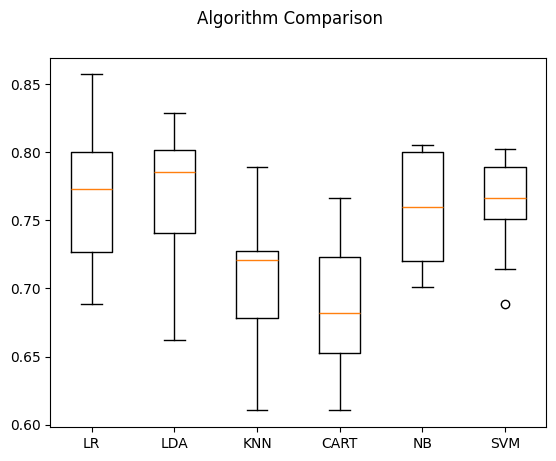

In [58]:
# boxplot algorithm comparison
from matplotlib import pyplot

fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

-------
# Chapter 14 - Automate ML Workflows with Pipelines

- minimize data leakage
- data preparation
- feature extraction


- SciKit Learn has built in Pipeline utility
- Pipelines allow for a linear sequence of data transforms to be chained together in a modeling process that can be evaluated.

http://scikit-learn.org/stable/modules/pipeline.html

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline

### Data Prep and Modeling Pipeline

- major trap in applied ML is leaking data from your training dataset to your test dataset.
- you need straong separating between you training and testing data


- In data Prep it is easy to leak knowledge of the whole training dataset to the algorithm
- preparing data using Nromaliseation or standarisation on the whole dataset would introduce scale from the test data into the training data.
- Pipeplines help you prevent data leakage in you test harness by ensuring that data preparation is constrained to each fold of your cross-validation procedure.


1) Standardize the data 
2) Learn a Linear Discriminant Analysis model


In [62]:
# create pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)


In [63]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


We create a Python list of steps that is fed into the pipeline
<br>The Pipeline is treated as an estimator and is evaluated in its entirety by the k-fold cross_validation

### Feature Extraction and Modeling Pipeline
- another proceedure that is suseptible to data leakage.
- must be restricted to the data in your dataset.
- FeatureUnion allows for the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained
- all feature extraction and feature union occurs within each fold of the cros-validated procedure


1) Feature Extraction with PCA (3 features)
2) Feature Extraction with Statistical Selection (6 features)
3) feature Union
4) Learn a Logistic Regression Model


In [64]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [66]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)


In [67]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)

In [69]:
# evaluate pipline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7721633629528366


The FeatureUnion is its own Pipeline that in turn is a single step in the final Pipeline

<br> We saw 2 important use cases Pipelines:
- Data Preparation and modeling constrained to each fold
- feature extraction and feature union constrained to each fold
